In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn import svm
import numpy as np

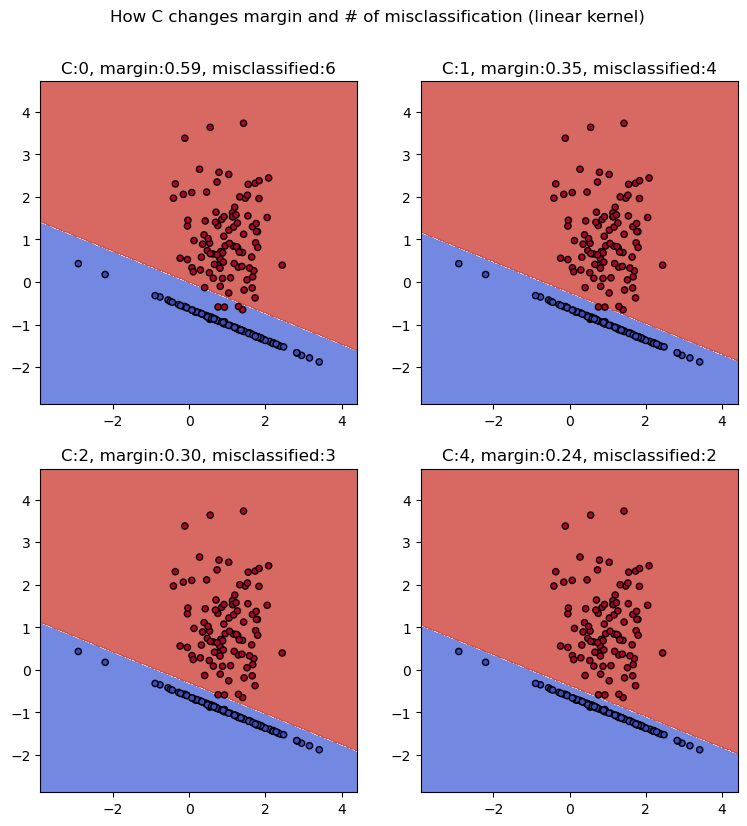

In [6]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
#------------------------------------------- helper function from Scikitlearn website to plot decision boundaries
# SVM with linear kernel
models = [svm.SVC(kernel = 'linear', C= 0.1),
          svm.SVC(kernel = 'linear', C= 1),
          svm.SVC(kernel = 'linear', C= 2 ),
          svm.SVC(kernel = 'linear', C = 4)]
C = [0.1,1,2,4]

X,Y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                          class_sep=1, n_clusters_per_class=1, random_state=2)

xMesh, yMesh = make_meshgrid( X[:, 0],  X[:, 1])
fig, axes = plt.subplots(2,2)
fig.set_size_inches((9,9))
fig.suptitle('How C changes margin and # of misclassification (linear kernel)')
for ax,model,c in zip(axes.flatten(),models, C):
    model.fit(X,Y)
    plot_contours(ax, model, xMesh, yMesh,
                      cmap=plt.cm.coolwarm, alpha=0.8)
    margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
    misclassified = sum (model.predict(X) !=Y)
    ax.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title('C:%d, margin:%.2f, misclassified:%d' %(c,margin, misclassified))
fig.subplots_adjust (top=0.9)

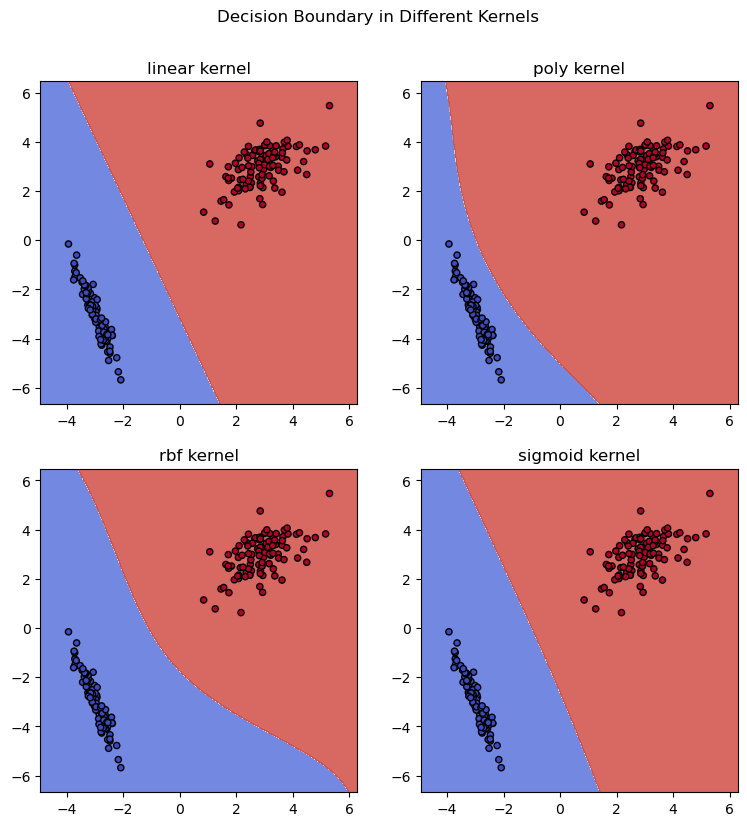

In [7]:
# SVM with linear kernel
models = [svm.SVC(kernel = 'linear'),
          svm.SVC(kernel = 'poly'),
          svm.SVC(kernel = 'rbf'),
          svm.SVC(kernel = 'sigmoid')]
kernels = ['linear','poly','rbf','sigmoid']

X,Y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                          class_sep=3, n_clusters_per_class=1, random_state=6)
xMesh, yMesh = make_meshgrid( X[:, 0],  X[:, 1])
fig, axes = plt.subplots(2,2)
fig.set_size_inches((9,9))
fig.suptitle('Decision Boundary in Different Kernels')
for ax,model,kernel in zip(axes.flatten(),models, kernels):
    model.fit(X,Y)
    plot_contours(ax, model, xMesh, yMesh,
                      cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_title(kernel + ' kernel')
fig.subplots_adjust (top=0.9)